## Analise Exploratória de Dados

### Plataforma de Alugueis

#### Objetivo:
##### Analisar os dados fornecidos e responder perguntas, afim de auxiliar no desenvolvimento de um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

In [2]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

plt.style.use('ggplot')

In [3]:
#importando base de dados
base = pd.read_csv('teste_indicium_precificacao.csv')

In [4]:
#Verificando primeiras linhas da base de dados
base.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Resumo dos dados

*id* – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

*nome* - Representa o nome do anúncio

*host_id* - Representa o id do usuário que hospedou o anúncio

*host_name* – Contém o nome do usuário que hospedou o anúncio

*bairro_group* - Contém o nome do bairro onde o anúncio está localizado

*bairro* - Contém o nome da área onde o anúncio está localizado

*latitude* - Contém a latitude do local

*longitude* - Contém a longitude do local

*room_type* – Contém o tipo de espaço de cada anúncio

*price* - Contém o preço por noite em dólares listado pelo anfitrião

*minimo_noites* - Contém o número mínimo de noites que o usuário deve reservar

*numero_de_reviews* - Contém o número de comentários dados a cada listagem

*ultima_review* - Contém a data da última revisão dada à listagem

*reviews_por_mes* - Contém o número de avaliações fornecidas por mês

*calculado_host_listings_count* - Contém a quantidade de listagem por host

*disponibilidade_365* - Contém o número de dias em que o anúncio está disponível para reserva


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

### Tratando os Dados

In [6]:
# Salvando a base de dados antes do tratamento dos dados
base1=base.copy()

In [7]:
base1.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [8]:
# Verificando se podemos apagar as linhas que continham valores em branco.
print("{:.0%}".format(base1['reviews_por_mes'].count() / base1.shape[0]))

79%


In [9]:
# Removendo Valores Vazios

base1 = base1.dropna(how= "any", axis=0)

In [10]:
# Verificando se foi removido
base1.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [27]:
# convertendo tipo de dados, a tabela 'Ultima review' foi alterada para o tipo Data.
base1['ultima_review'] = pd.to_datetime(base1['ultima_review'], errors="coerce")
base1['price'] = base1['price'].astype(float)

In [28]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             38820 non-null  int64         
 1   nome                           38820 non-null  object        
 2   host_id                        38820 non-null  int64         
 3   host_name                      38820 non-null  object        
 4   bairro_group                   38820 non-null  object        
 5   bairro                         38820 non-null  object        
 6   latitude                       38820 non-null  float64       
 7   longitude                      38820 non-null  float64       
 8   room_type                      38820 non-null  object        
 9   price                          38820 non-null  float64       
 10  minimo_noites                  38820 non-null  int64         
 11  numero_de_reviews   

In [29]:
# fixando em 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [20]:
base1.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,38820.00,38820.00,38820.00,38820.00,38820.00,38820.00,38820.00,38820,38820.00,38820.00,38820.00
mean,18101274.43,64247473.53,40.73,-73.95,142.33,5.87,29.29,2018-10-04 07:23:14.374033920,1.37,5.17,114.88
min,2595.00,2438.00,40.51,-74.24,0.00,1.00,1.00,2011-03-28 00:00:00,0.01,1.00,0.00
25%,8722029.00,7032516.75,40.69,-73.98,69.00,1.00,3.00,2018-07-09 00:00:00,0.19,1.00,0.00
50%,18873394.00,28371425.50,40.72,-73.95,101.00,2.00,9.00,2019-05-19 00:00:00,0.72,1.00,55.00
75%,27567918.25,101909249.00,40.76,-73.94,170.00,4.00,33.00,2019-06-23 00:00:00,2.02,2.00,229.00
max,36455809.00,273841667.00,40.91,-73.71,10000.00,1250.00,629.00,2019-07-08 00:00:00,58.50,327.00,365.00
std,10693465.53,75897793.59,0.05,0.05,197.00,17.39,48.18,NaN,1.68,26.30,129.53


In [30]:
base1.shape

(38820, 16)

## Analise dos Dados

In [31]:
base.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,38842.00,48894.00,48894.00
mean,19017532.13,67621393.58,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10982884.05,78611176.15,0.05,0.05,240.16,20.51,44.55,1.68,32.95,131.62
min,2595.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9472370.75,7822736.75,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677431.50,30795529.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152249.25,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [32]:
# imoveis cadastrados por bairro
base1['bairro'].value_counts()

bairro
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Olinville                2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [52]:
# Imoveis cadastrados por Grupo de Bairros
base1['bairro_group'].value_counts(1)

bairro_group
Manhattan       0.43
Brooklyn        0.42
Queens          0.12
Bronx           0.02
Staten Island   0.01
Name: proportion, dtype: float64

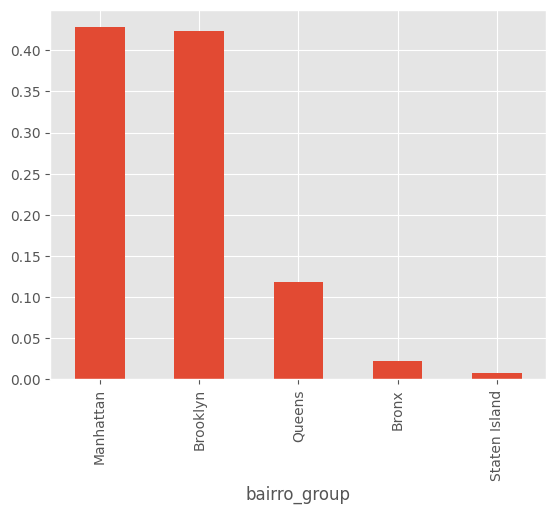

In [53]:
_=base1.bairro_group.value_counts(1).plot.bar()

*43% dos imoveis cadastrados estão localizados em Manhattan*

*42% no Broklin*

*12% no Queens*

*2%  no Bronx*

*1%  no Staten Island*

In [50]:
# Quantidade de imoveis por bairro
base1.bairro.value_counts()

bairro
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Olinville                2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

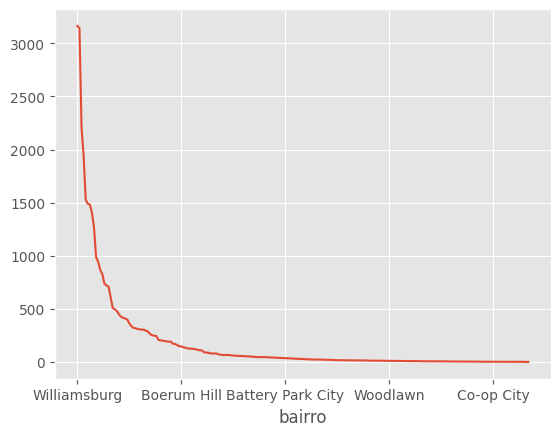

In [51]:
_=base1.bairro.value_counts().plot.line()

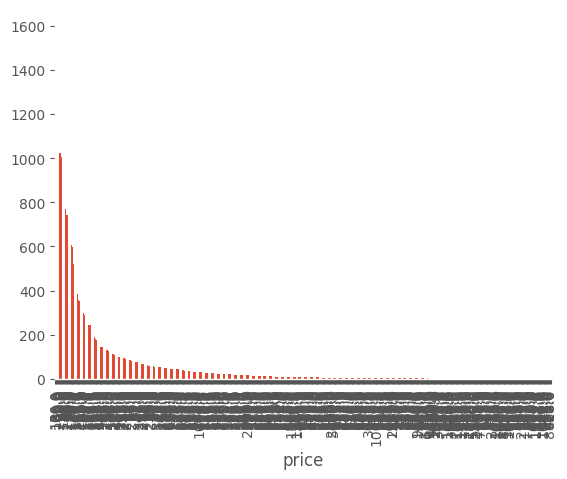

In [76]:
_=base1.price.value_counts().plot.bar()

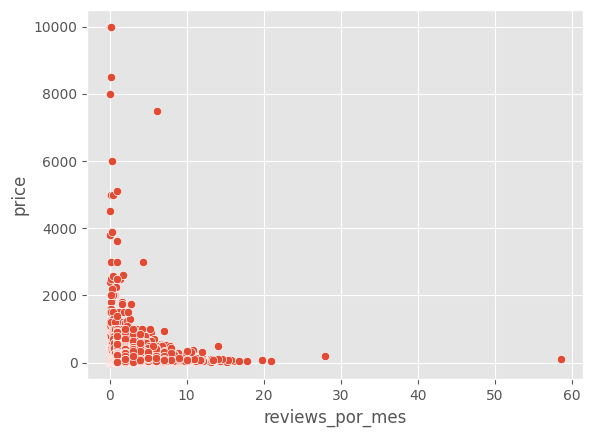

In [69]:
_ = sbn.scatterplot(x='reviews_por_mes', y='price', data = base1)

##### Perguntas:

Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


In [87]:
base1.query('price==10000')

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.77,-73.92,Private room,10000.00,100,2,2016-02-13,0.04,1,0
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73,-73.96,Entire home/apt,10000.00,5,5,2017-07-27,0.16,1,0


O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

##### Supondo um apartamento com as seguintes características:

*'id': 2595,*

 *'nome': 'Skylit Midtown Castle',*

 *'host_id': 2845,*

 *'host_name': 'Jennifer',*

 *'bairro_group': 'Manhattan',*

 *'bairro': 'Midtown',*

 *'latitude': 40.75362,*

 *'longitude': -73.98377,*

 *'room_type': 'Entire home/apt',*

 *'minimo_noites': 1,*

 *'numero_de_reviews': 45,*

 *'ultima_review': '2019-05-21',*

 *'reviews_por_mes': 0.38,*

 *'calculado_host_listings_count': 2,*

 *'disponibilidade_365': 355*


Qual seria a sua sugestão de preço?

In [85]:
base1.query('id == 2595')

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225.00,1,45,2019-05-21,0.38,2,355


*Sugestão de preço, $225,00*